In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

In [133]:
hetero = pd.read_csv('../Data/Heteromers/protList.tab')
homome = pd.read_table('../Data/Homomers/protList.tab')
hetero

,Function,UniID,Species,PDB,chain,to
0,Transcription,P54784,Scer,1zhi,A,B
1,CompheEri,P01588,Hsap,1eer,A,B
2,Electrans,P13804,Hsap,1efv,A,B
3,Transferase,P18956,Ecoli,2e0x,A,B
4,mRNAbind,G5ECF1,Celg,3zhe,A,B


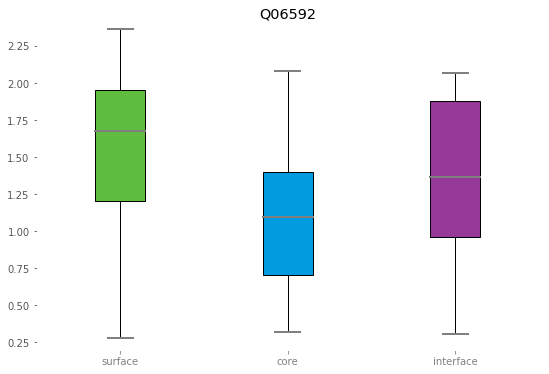

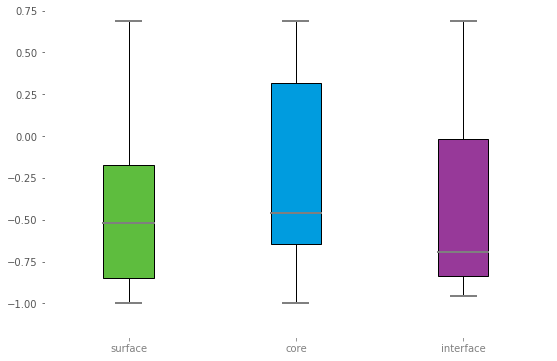

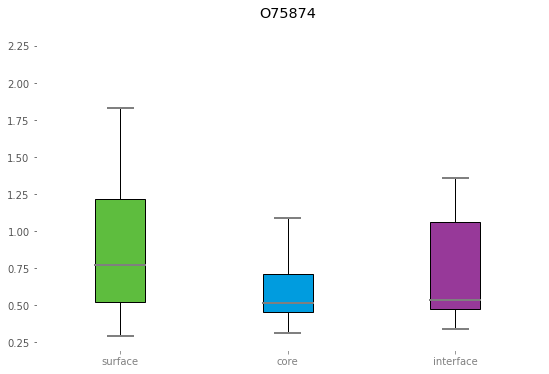

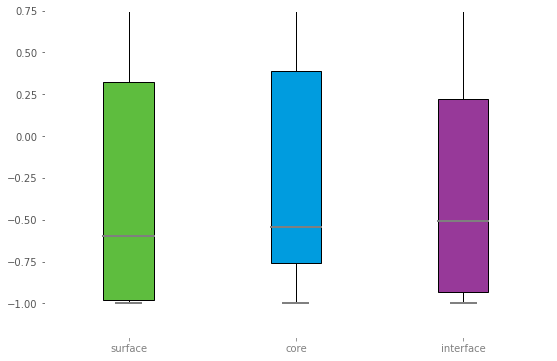

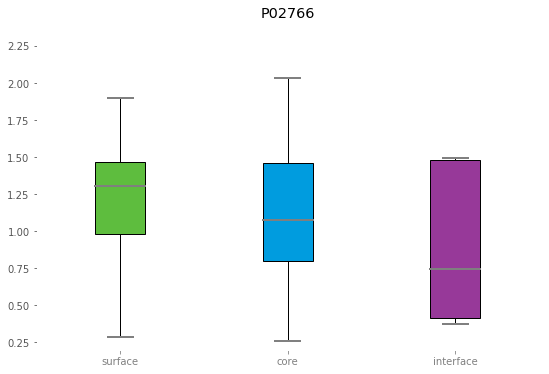

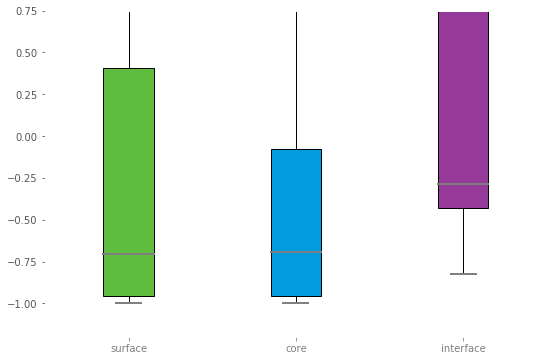

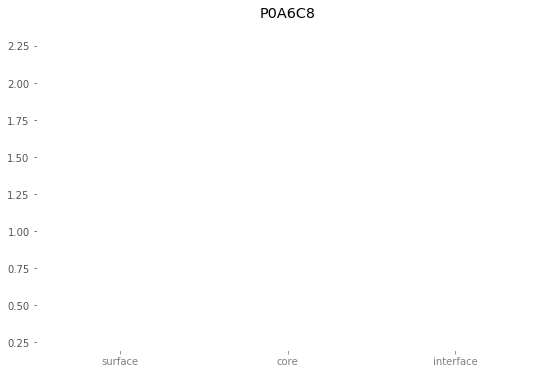

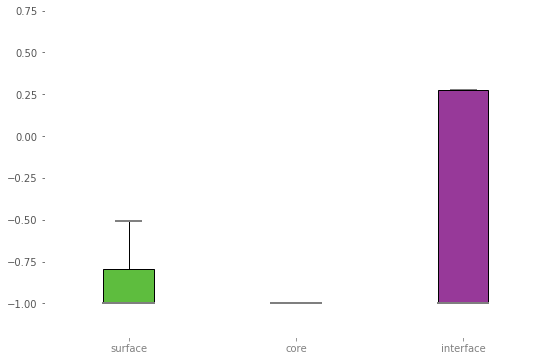

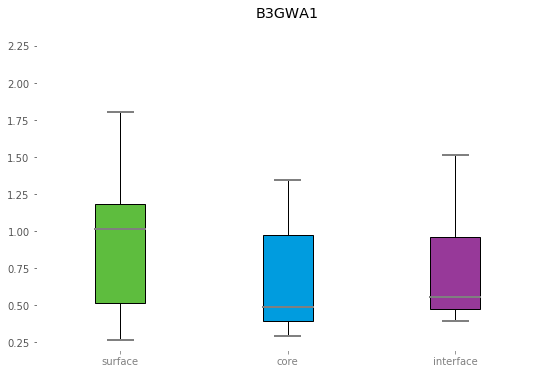

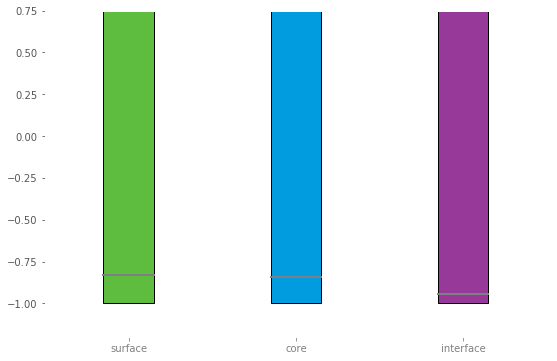

In [134]:
for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']

    generatePlotHomo(code, pdb, f, t)

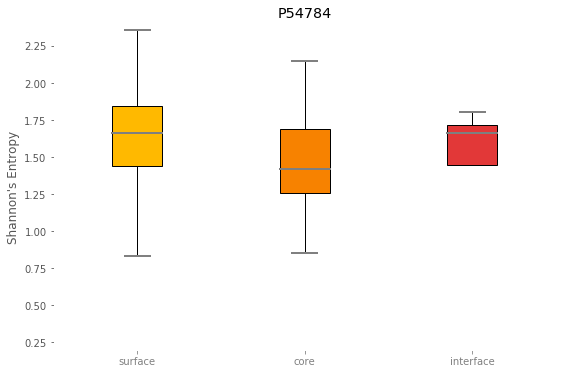

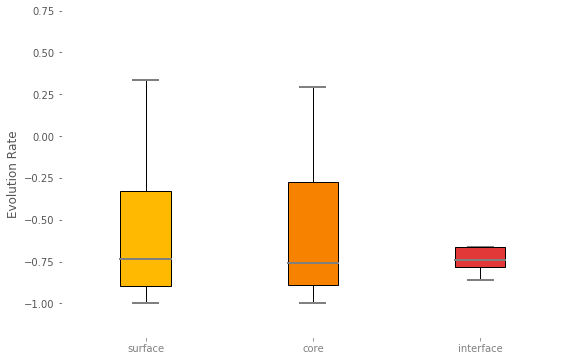

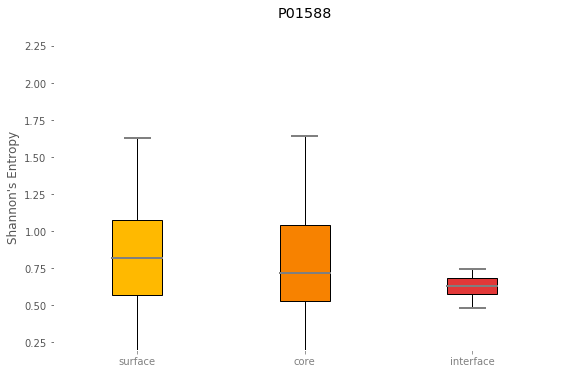

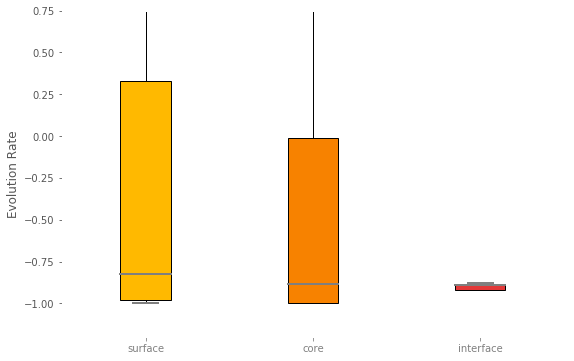

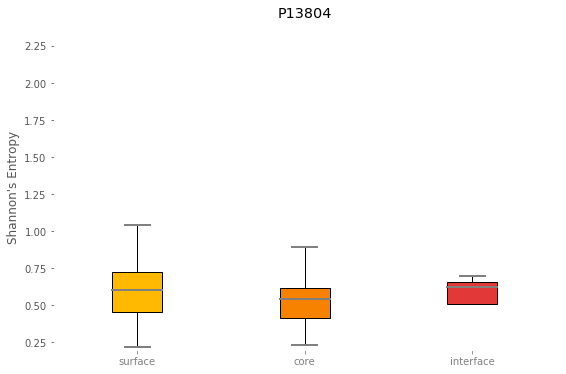

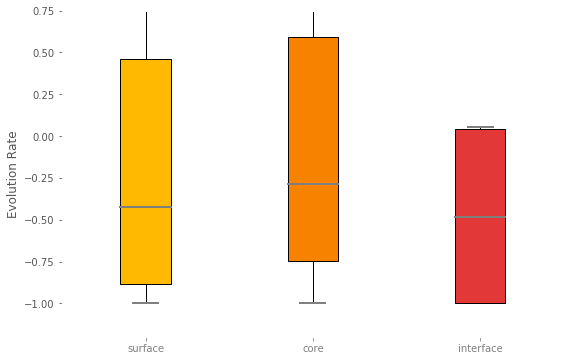

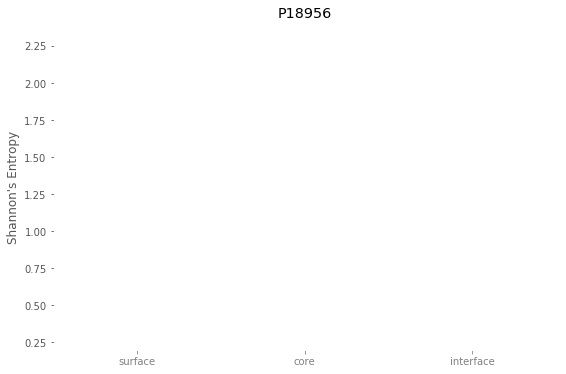

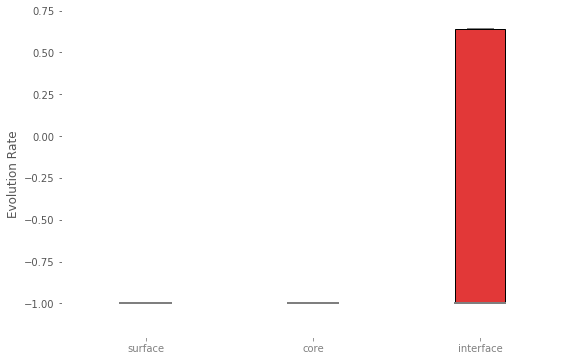

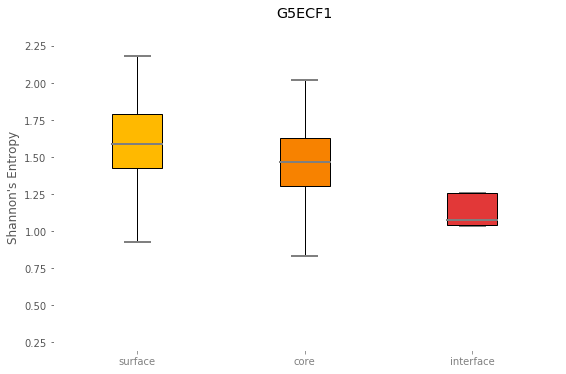

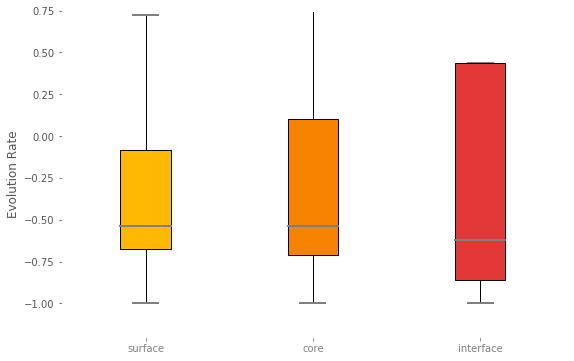

In [135]:
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    generatePlotHetero(code, pdb, f, t)

In [107]:
def generatePlotHomo(code, pdb, f, t):
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    surfHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    
    

    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#5EBD3E', '#009CDF', '#973999')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
 
    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])
    plt.title(code)

    plt.ylim((0.2, 2.4))
    # Save the figure
    fig.savefig(code+'_box_shannon.png', bbox_inches='tight')
    plt.show()
    
    
    ## PLOT RATIO!!
    
    surfHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][1] for i in surfDic if i in inter)


    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))


    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#5EBD3E', '#009CDF', '#973999')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])

    
    plt.ylim((-1.2, 0.75))
    # Save the figure
    fig.savefig(code+'_box_ratio.png', bbox_inches='tight')
    plt.show()
    
    """

    fig = plt.figure(1, figsize=(9, 6))
    x = data["norm"]
    y = data["entropy"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    lx = np.arange(start=min(x), stop=max(x)+0.5, step=len(x)/1000)
    ly = tuple(slope*i + intercept for i in lx)
    plt.scatter(x,y, color='#3a3a3a')
    plt.plot(lx, ly, color='steelblue')
    plt.title(code)
    plt.ylabel("Shannon's entropy")
    fig.savefig(code+'_scatter.png', bbox_inches='tight')
    plt.show()

    for i in surfDic:
        if surfDic[i] == 1 and i not in inter:
            print('color chartreuse, resi', i)
        elif surfDic[i] == 0 and i not in inter:
            print('color marine, resi', i)

    for i in inter:
        print('color purpleblue, resi', i)
    """

    

In [74]:
heteSur, heteCore, heteInter = ('#FFB900', '#F78200', '#E23838')
homoSur, homoCore, homoInter = ('#5EBD3E', '#009CDF', '#973999')

In [109]:
def generatePlotHetero(code, pdb, f, t):
    # hetero
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

    import matplotlib.pyplot as plt
    import numpy as np

    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))


    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#FFB900', '#F78200', '#E23838')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])
    plt.ylabel("Shannon's Entropy")
    plt.title(code)
    plt.ylim((0.2, 2.4))

    # Save the figure
    fig.savefig(code+'_box_shannon.png', bbox_inches='tight')
    plt.show()


    surfHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][1] for i in surfDic if i in inter)


    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))


    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#FFB900', '#F78200', '#E23838')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])
    plt.ylabel('Evolution Rate')
    plt.ylim((-1.2, 0.75))
    # Save the figure
    fig.savefig(code+'_box_ratio.png', bbox_inches='tight')
    plt.show()
"""
    fig = plt.figure(1, figsize=(9, 6))
    x = data["norm"]
    y = data["entropy"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    lx = np.arange(start=min(x), stop=max(x+0.5), step=len(x)/1000)
    ly = tuple(slope*i + intercept for i in lx)
    plt.scatter(x,y, color='#3a3a3a')
    plt.plot()
    plt.plot(lx, ly, color='firebrick')
    plt.title(code)
    plt.xlabel('Evolution Rate')
    plt.ylabel("Shannon's entropy")
    fig.savefig(code+'_scatter.png', bbox_inches='tight')
    plt.show()

    

    for i in surfDic:
        if surfDic[i] == 1:
            print('color yelloworange, resi', i)
        elif surfDic[i] == 0 :
            print('color tv_orange, resi', i)
    for i in inter:
        print('color firebrick, resi', i)
"""

'\n    fig = plt.figure(1, figsize=(9, 6))\n    x = data["norm"]\n    y = data["entropy"]\n    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)\n    lx = np.arange(start=min(x), stop=max(x+0.5), step=len(x)/1000)\n    ly = tuple(slope*i + intercept for i in lx)\n    plt.scatter(x,y, color=\'#3a3a3a\')\n    plt.plot()\n    plt.plot(lx, ly, color=\'firebrick\')\n    plt.title(code)\n    plt.xlabel(\'Evolution Rate\')\n    plt.ylabel("Shannon\'s entropy")\n    fig.savefig(code+\'_scatter.png\', bbox_inches=\'tight\')\n    plt.show()\n\n    \n\n    for i in surfDic:\n        if surfDic[i] == 1:\n            print(\'color yelloworange, resi\', i)\n        elif surfDic[i] == 0 :\n            print(\'color tv_orange, resi\', i)\n    for i in inter:\n        print(\'color firebrick, resi\', i)\n'

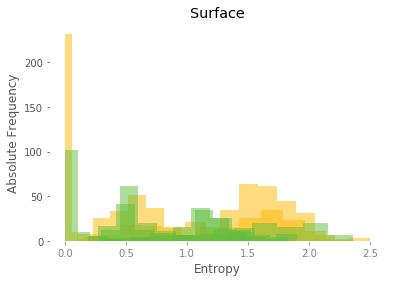

In [99]:
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)

    plt.hist(surfHist, alpha=0.5, color='#FFB900')

for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    surfHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    #coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    #intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    plt.hist(surfHist, alpha=0.5, color='#5EBD3E')
    plt.xlabel('Entropy')
    plt.title('Surface')
    plt.ylabel('Absolute Frequency')
    
    plt.savefig("Surface_entropy")

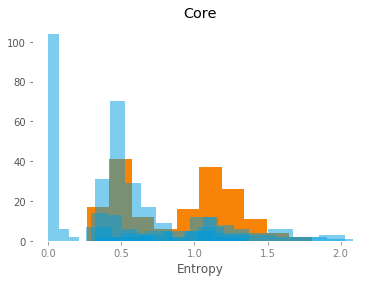

In [100]:
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)

    plt.hist(surfHist, alpha=0.5, color=heteCore)

for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    #surfHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    #intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    plt.hist(coreHist, alpha=0.5, color=homoCore)
    plt.xlabel('Entropy')
    plt.title('Core')
    plt.savefig("Core_Entropy")

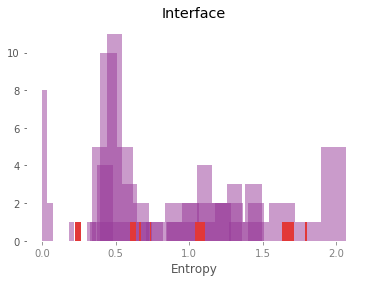

In [101]:
for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    #surfHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    #coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    plt.hist(intrHist, alpha=0.5, color=homoInter)

for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    plt.hist(intrHist, alpha=1, color=heteInter)


    plt.xlabel('Entropy')
    plt.title('Interface')
    plt.savefig("Interface_entropy")

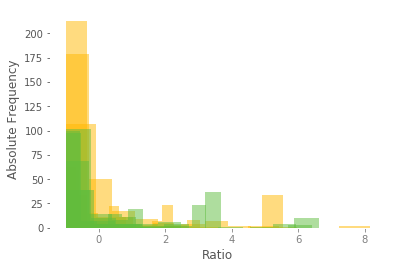

In [102]:
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    surfHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)

    plt.hist(surfHist, alpha=0.5, color='#FFB900')

for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    surfHist = tuple(dataDic[i][1] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    #coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    #intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    plt.hist(surfHist, alpha=0.5, color='#5EBD3E')
    plt.xlabel('Ratio')
    plt.ylabel('Absolute Frequency')
    plt.savefig("Surface_ratio")

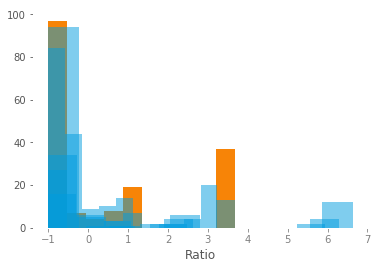

In [103]:
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    coreHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)

    plt.hist(surfHist, alpha=0.5, color=heteCore)

for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    #surfHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][1] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    #intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    plt.hist(coreHist, alpha=0.5, color=homoCore)
    plt.xlabel('Ratio')
    
    plt.savefig("Core_ratio")

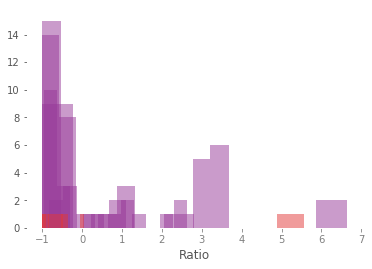

In [104]:
for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    #surfHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    #coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][1] for i in posi if i in inter)
    plt.hist(intrHist, alpha=0.5, color=homoInter)

for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    intrHist = tuple(dataDic[i][1] for i in posi if i in inter)
    plt.hist(intrHist, alpha=0.5, color=heteInter)


    plt.xlabel('Ratio')
    
    plt.savefig("Interface_ratio")

In [126]:
ratHomo = []
for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    coreHist = tuple(dataDic[i][1] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][1] for i in posi if i in inter)
    
    meanCore = sum(coreHist) / len(coreHist)
    meanIntr = sum(intrHist) / len(intrHist)
    
    r = meanIntr/meanCore
    print(code, r)
    ratHomo.append(r)
    
ratHete = []
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')
    
    
    posi = tuple(surf['pos'])

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])
    
    coreHist = tuple(dataDic[i][1] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][1] for i in posi if i in inter)
    
    
    meanCore = sum(coreHist) / len(coreHist)
    meanIntr = sum(intrHist) / len(intrHist)
    
    
    r = meanIntr/meanCore
    print(code, r)
    ratHete.append(r)


Q06592 -0.8695269064318841
O75874 1.8612551251369827
P02766 2.9493297928393987
P0A6C8 9.484564012162277
B3GWA1 0.73197931115516
P54784 22.77191192040325
P01588 10.808328402014142
P13804 -3.617131297210524
P18956 -2.668915766850588
G5ECF1 3.61852760321467


In [ ]:
## Box plot!

In [123]:
entHomo = []
for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    
    meanCore = sum(coreHist) / len(coreHist)
    meanIntr = sum(intrHist) / len(intrHist)
    
    r = meanIntr/meanCore
    print(code, r)
    entHomo.append(r)
    
entHete = []
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')
    
    
    posi = tuple(surf['pos'])

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])
    
    coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    
    
    meanCore = sum(coreHist) / len(coreHist)
    meanIntr = sum(intrHist) / len(intrHist)
    
    
    r = meanIntr/meanCore
    print(code, r)
    entHete.append(r)


Q06592 1.2546334438730644
O75874 1.155022199459711
P02766 0.835116234685179
P0A6C8 1.4194657845202423
B3GWA1 1.1356056179535723
P54784 1.0278159858118534
P01588 0.8000662873738513
P13804 1.0066082312360907
P18956 0.2763507663094529
G5ECF1 0.844684062711608


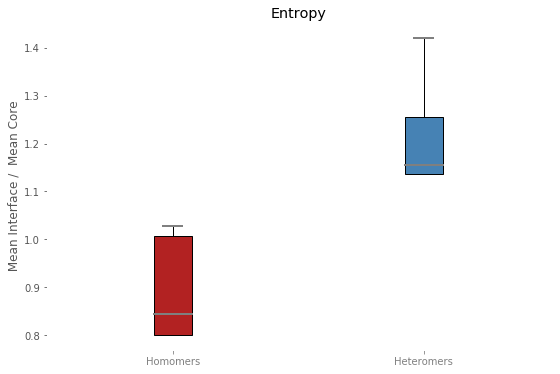

In [124]:
# boxplot

data_to_plot = (entHete, entHomo)
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))


plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='white'
plt.rcParams['xtick.color']='gray'

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

for cap in bp['caps']:
    cap.set(color='grey', linewidth=2)

colors = ('firebrick', 'steelblue')
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#7f7f7f', linewidth=2)
plt.xticks((1, 2), ['Homomers', 'Heteromers'])
plt.ylabel(" Mean Interface /  Mean Core")
plt.title('Entropy')

# Save the figure
fig.savefig('box_shannon_ratio.png', bbox_inches='tight')
plt.show()

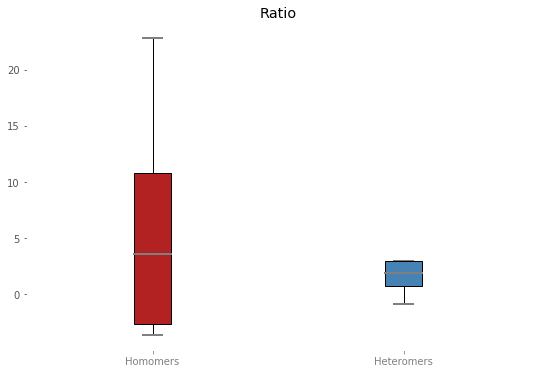

In [128]:
# boxplot

data_to_plot = (ratHete, ratHomo)
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))


plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='white'
plt.rcParams['xtick.color']='gray'

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

for cap in bp['caps']:
    cap.set(color='grey', linewidth=2)

colors = ('firebrick', 'steelblue')
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#7f7f7f', linewidth=2)
plt.xticks((1, 2), ['Homomers', 'Heteromers'])
plt.title('Ratio')

# Save the figure
fig.savefig('box_ratio_ratio.png', bbox_inches='tight')
plt.show()

In [131]:
stats.ttest_ind(entHete, entHomo)

Ttest_indResult(statistic=-2.2186024813147127, pvalue=0.057306897278606606)

In [132]:
stats.ttest_ind(ratHete, ratHomo)

Ttest_indResult(statistic=0.6443768740198077, pvalue=0.5373648236051978)